In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


file_path = r'C:\Users\ateso\Desktop\Ironhack\Project-2\data\world_data.csv'

df = pd.read_csv(file_path)





C:\Users\ateso\AppData\Local\Temp\ipykernel_22348\381740493.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [57]:
df.head()

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98%,3.00%


In [3]:
df_grow = df[["rank", "country","1990 population", "2000 population", "2010 population", "2020 population"]]

In [4]:
df_grow.groupby("country")[["1990 population", "2000 population", "2010 population", "2020 population"]].mean()

df_grow.head(5)

,rank,country,1990 population,2000 population,2010 population,2020 population
0,1,India,870452165,1059633675,1240613620,1396387127
1,2,China,1153704252,1264099069,1348191368,1424929781
2,3,United States,248083732,282398554,311182845,335942003
3,4,Indonesia,182159874,214072421,244016173,271857970
4,5,Pakistan,115414069,154369924,194454498,227196741


In [5]:
df_india_china = df[df["country"].isin(["India", "China"])][["country","2023 population", "area (km²)", "density (km²)"]]

df_india_china



,country,2023 population,area (km²),density (km²)
0,India,1428627663,3287590.0,481
1,China,1425671352,9706961.0,151


In [6]:
df_world = df[["country","world percentage","growth rate"]].head(5)
df_world

,country,world percentage,growth rate
0,India,17.85%,0.81%
1,China,17.81%,-0.02%
2,United States,4.25%,0.50%
3,Indonesia,3.47%,0.74%
4,Pakistan,3.00%,1.98%


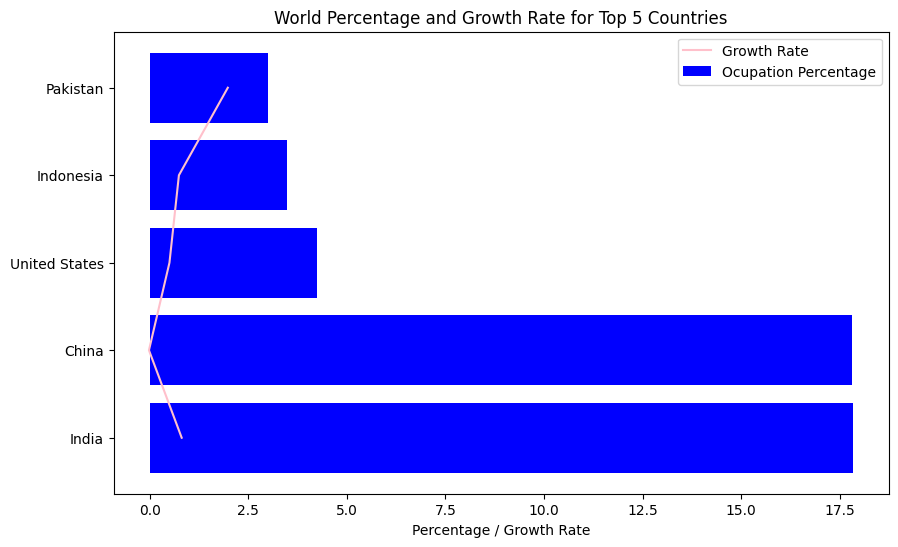

In [60]:
df_world = pd.DataFrame({
    "country": ["India", "China", "United States", "Indonesia", "Pakistan"],
    "world percentage": [17.85, 17.81, 4.25, 3.47, 3.00],
    "growth rate": [0.81, -0.02, 0.50, 0.74, 1.98]
})

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(df_world["country"], df_world["world percentage"], label="Ocupation Percentage", color="blue")
ax.plot(df_world["growth rate"], df_world["country"], label="Growth Rate", color="pink")

plt.xlabel("Percentage / Growth Rate")
plt.title("World Percentage and Growth Rate for Top 5 Countries")
plt.legend();



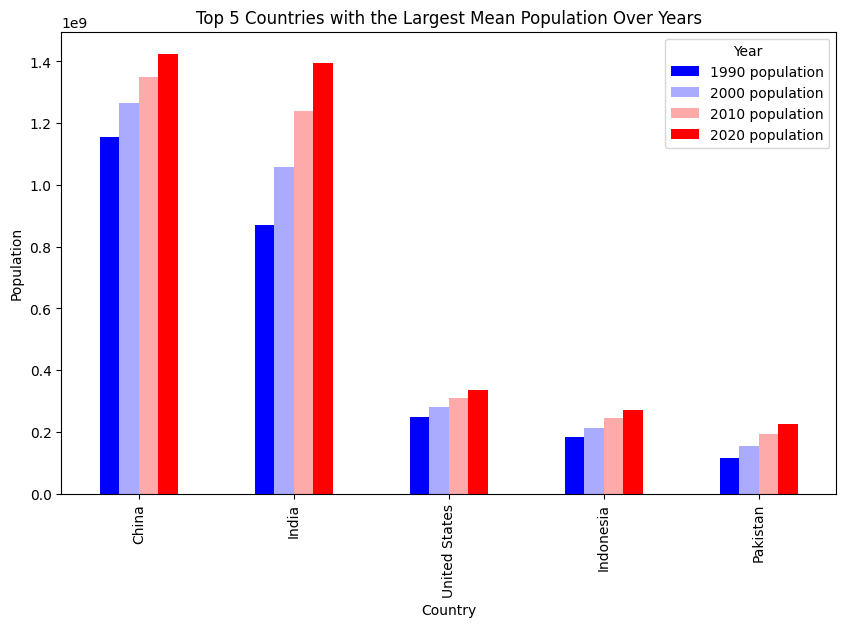

In [246]:
result = df_grow.groupby("country")[["1990 population", "2000 population", "2010 population", "2020 population"]].mean()

sorted_result = result.sort_values(by="2020 population", ascending=False)
top5 = sorted_result.head(5)


top5.plot(kind='bar', figsize=(10, 6), title='Top 5 Countries with the Largest Mean Population Over Years', colormap="bwr")


plt.xlabel('Country')
plt.ylabel('Population')
plt.legend(title='Year');

In [247]:
df

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.00,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.00,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.00,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.00,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.00,312,1.98%,3.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,MSR,Montserrat,North America,4386,4390,4500,5059,4938,5138,10805,11452,11402,102.00,43,-0.09%,0.00%
230,231,FLK,Falkland Islands,South America,3791,3780,3747,3408,3187,3080,2332,2240,2274,12173.00,0,0.29%,0.00%
231,232,NIU,Niue,Oceania,1935,1934,1942,1847,1812,2074,2533,3637,5185,261.00,7,0.05%,0.00%
232,233,TKL,Tokelau,Oceania,1893,1871,1827,1454,1367,1666,1669,1647,1714,12.00,189,1.18%,0.00%


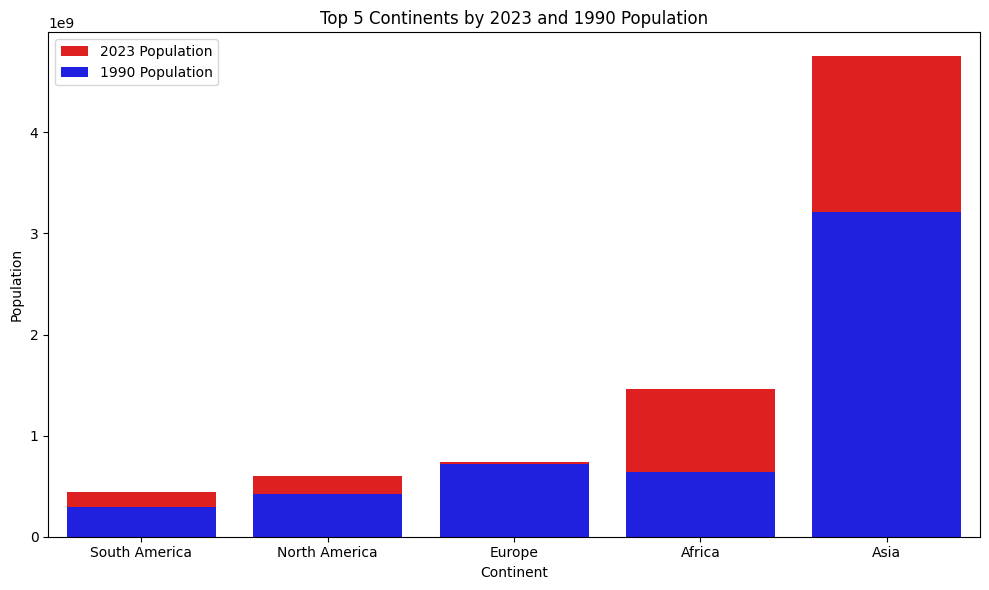

In [248]:
continents = ["Asia", "North America", "Europe", "Africa", "South America"]
df_cont = df[df['continent'].isin(continents)]

continent_population = df_cont.groupby("continent")[["2023 population", "1990 population"]].sum().reset_index()
continent_population = continent_population.sort_values(by='2023 population', ascending=True)
top_5_continents = continent_population.head(5)

plt.figure(figsize=(10, 6))

sns.barplot(x='continent', y='2023 population', data=top_5_continents, color='red', label='2023 Population')
sns.barplot(x='continent', y='1990 population', data=top_5_continents, color='blue', label='1990 Population')

plt.title('Top 5 Continents by 2023 and 1990 Population')
plt.xlabel('Continent')
plt.ylabel('Population')
plt.legend()
plt.tight_layout();



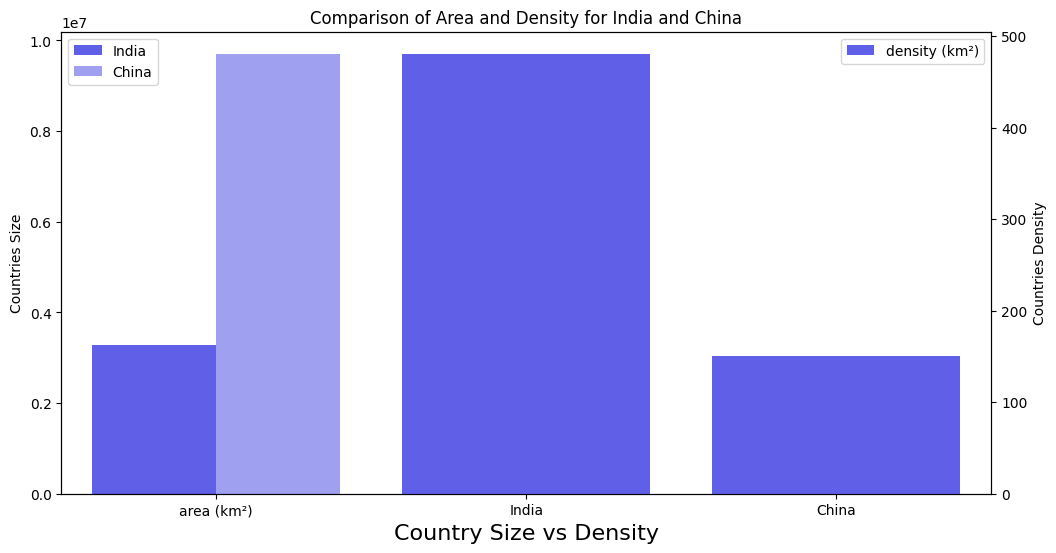

In [252]:
df = pd.DataFrame({
    'country': ['India', 'China'],
    '2023 population': [1428627663, 1425671352],
    'area (km²)': [3287590.0, 9706961.0],
    'density (km²)': [481, 151]
})


df_bars = df[["country", "area (km²)", "density (km²)"]]
df_mixed = pd.melt(df_bars, id_vars = "country", var_name = "Variable", value_name="Value")
plt.figure(figsize=(12, 6))

sns.barplot(x = "Variable", y = "Value", hue = "country", data = df_mixed[df_mixed["Variable"] == "area (km²)"])
plt.legend(loc="upper left")
plt.xlabel("Country Size vs Density", fontsize=16)
plt.ylabel("Countries Size")


ax2 = plt.twinx()
sns.barplot(x="country", y="Value", hue="Variable", data=df_mixed[df_mixed["Variable"] == "density (km²)"], ax=ax2)
ax2.legend(loc='upper right')


plt.title("Comparison of Area and Density for India and China")
plt.ylabel("Countries Density");

